# Creación de un modelo desde cero: normalización de lotes

## Librerías necesarias

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

## Variables globales del sistema

In [3]:
original_dir = pathlib.Path("ExpandedDataset/")
new_base_dir = pathlib.Path("ExpandedDataset_organized/")
content = os.listdir(original_dir)
BATCH_SIZE = 64
size_x = 256
size_y = 256

## Creación de los datasets específicos a partir de las carpetas 

In [12]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')

Found 9280 files belonging to 58 classes.
Found 1160 files belonging to 58 classes.
Found 1160 files belonging to 58 classes.


## Modelo con normalización de lotes: modelo cuatro

In [27]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = x
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, use_bias=False, padding = "same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = layers.Conv2D(64, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=64, kernel_size=3, use_bias=False, padding = "same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, use_bias=False, padding = "same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=128, kernel_size=3, use_bias=False,  padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=256, kernel_size=3, use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, use_bias=False,padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
residual = x 
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
x = layers.Conv2D(filters=512, kernel_size=3, use_bias=False,padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = layers.Conv2D(512, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dense(256, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model4 = keras.Model(inputs=inputs, outputs=outputs)

model4.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling_9 (Rescaling)         (None, 256, 256, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_131 (Conv2D)             (None, 254, 254, 16) 432         rescaling_9[0][0]                
__________________________________________________________________________________________________
batch_normalization_61 (BatchNo (None, 254, 254, 16) 64          conv2d_131[0][0]                 
____________________________________________________________________________________________

## Entrenamiento y guardado de resultados del modelo cuatro

In [28]:
model4.compile(loss="categorical_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model4/best_version",
    save_best_only=True,
    monitor="val_loss")
]

history = model4.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/30
145/145 [==============================] - 24s 144ms/step - loss: 3.4092 - accuracy: 0.1827 - val_loss: 7.0511 - val_accuracy: 0.0336
Epoch 2/30
145/145 [==============================] - 25s 166ms/step - loss: 2.1175 - accuracy: 0.3792 - val_loss: 5.9714 - val_accuracy: 0.0802
Epoch 3/30
145/145 [==============================] - 24s 154ms/step - loss: 1.6997 - accuracy: 0.4940 - val_loss: 2.9577 - val_accuracy: 0.2914
Epoch 4/30
145/145 [==============================] - 24s 162ms/step - loss: 1.4262 - accuracy: 0.5661 - val_loss: 1.5654 - val_accuracy: 0.5198
Epoch 5/30
145/145 [==============================] - 24s 161ms/step - loss: 1.2438 - accuracy: 0.6191 - val_loss: 1.9709 - val_accuracy: 0.4888
Epoch 6/30
145/145 [==============================] - 23s 152ms/step - loss: 1.1048 - accuracy: 0.6679 - val_loss: 2.1241 - val_accuracy: 0.4647
Epoch 7/30
145/145 [==============================] - 24s 160ms/step - loss: 0.9961 - accuracy: 0.6981 - val_loss: 1.6052 - val_ac

In [29]:
model4.save('model4/model')
np.save('model4/history.npy',history.history)

INFO:tensorflow:Assets written to: model4/model\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


## Análisis de resultados

In [30]:
my_history1=np.load('model3_10/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model4/history.npy',allow_pickle='TRUE').item()

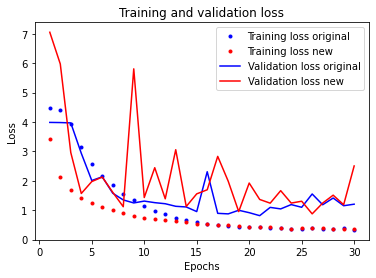

In [31]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

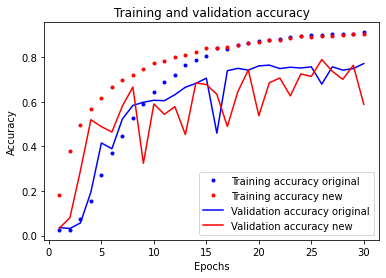

In [32]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [33]:
model = keras.models.load_model('model4/model')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 3s 74ms/step - loss: 2.7192 - accuracy: 0.5397


[2.719203472137451, 0.5396551489830017]

## Sustitución de la capa de aplanado: modelo 4.1

In [35]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = x
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, use_bias=False, padding = "same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = layers.Conv2D(64, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=64, kernel_size=3, use_bias=False, padding = "same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, use_bias=False, padding = "same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=128, kernel_size=3, use_bias=False,  padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=256, kernel_size=3, use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, use_bias=False,padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
residual = x 
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
x = layers.Conv2D(filters=512, kernel_size=3, use_bias=False,padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
residual = layers.Conv2D(512, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dense(256, activation = "relu")(x)
x = layers.GlobalAveragePooling2D()(x) 
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model4_1 = keras.Model(inputs=inputs, outputs=outputs)

model4_1.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling_11 (Rescaling)        (None, 256, 256, 3)  0           input_12[0][0]                   
__________________________________________________________________________________________________
conv2d_165 (Conv2D)             (None, 254, 254, 16) 432         rescaling_11[0][0]               
__________________________________________________________________________________________________
batch_normalization_81 (BatchNo (None, 254, 254, 16) 64          conv2d_165[0][0]                 
___________________________________________________________________________________________

In [36]:
model4_1.compile(loss="categorical_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

history = model4_1.fit(
 train_dataset,
 epochs=100,
 validation_data=validation_dataset)

Epoch 1/100
145/145 [==============================] - 29s 180ms/step - loss: 3.3604 - accuracy: 0.1791 - val_loss: 6.8599 - val_accuracy: 0.0388
Epoch 2/100
145/145 [==============================] - 26s 175ms/step - loss: 2.2647 - accuracy: 0.3512 - val_loss: 4.5178 - val_accuracy: 0.0922
Epoch 3/100
145/145 [==============================] - 23s 155ms/step - loss: 1.8340 - accuracy: 0.4589 - val_loss: 2.2062 - val_accuracy: 0.3621
Epoch 4/100
145/145 [==============================] - 26s 174ms/step - loss: 1.5498 - accuracy: 0.5323 - val_loss: 1.9539 - val_accuracy: 0.4509
Epoch 5/100
145/145 [==============================] - 24s 158ms/step - loss: 1.3400 - accuracy: 0.5922 - val_loss: 1.6549 - val_accuracy: 0.5284
Epoch 6/100
145/145 [==============================] - 26s 175ms/step - loss: 1.1838 - accuracy: 0.6279 - val_loss: 1.2732 - val_accuracy: 0.6336
Epoch 7/100
145/145 [==============================] - 46s 315ms/step - loss: 1.0370 - accuracy: 0.6766 - val_loss: 1.3708 -

Epoch 57/100
145/145 [==============================] - 36s 239ms/step - loss: 0.1389 - accuracy: 0.9585 - val_loss: 2.3257 - val_accuracy: 0.6853
Epoch 58/100
145/145 [==============================] - 37s 245ms/step - loss: 0.1316 - accuracy: 0.9644 - val_loss: 1.4211 - val_accuracy: 0.7750
Epoch 59/100
145/145 [==============================] - 35s 232ms/step - loss: 0.1404 - accuracy: 0.9608 - val_loss: 1.6283 - val_accuracy: 0.7466
Epoch 60/100
145/145 [==============================] - 35s 235ms/step - loss: 0.1305 - accuracy: 0.9620 - val_loss: 1.6904 - val_accuracy: 0.7431
Epoch 61/100
145/145 [==============================] - 34s 228ms/step - loss: 0.1367 - accuracy: 0.9634 - val_loss: 0.9928 - val_accuracy: 0.8078
Epoch 62/100
145/145 [==============================] - 35s 237ms/step - loss: 0.1494 - accuracy: 0.9614 - val_loss: 1.0306 - val_accuracy: 0.8336
Epoch 63/100
145/145 [==============================] - 35s 236ms/step - loss: 0.1427 - accuracy: 0.9624 - val_loss: 0

In [37]:
model4_1.save('model4_1/model')
np.save('model4_1/history.npy',history.history)

INFO:tensorflow:Assets written to: model4_1/model\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


## Análisis de resultados

In [41]:
my_history=np.load('model4_1/history.npy',allow_pickle='TRUE').item()

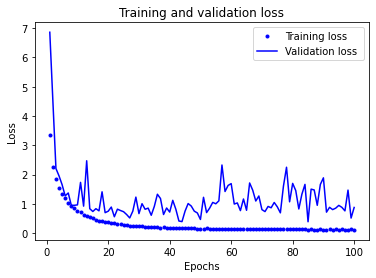

In [45]:
loss = my_history["loss"]
val_loss = my_history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "b.", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss ")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

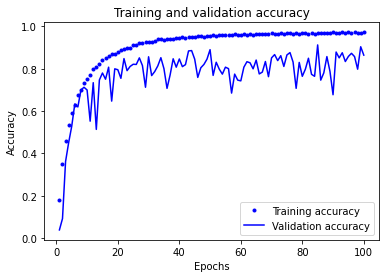

In [44]:

plt.clf()

acc = my_history["accuracy"]
val_acc = my_history["val_accuracy"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, "b.", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [46]:
model = keras.models.load_model('model4_1/model')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 3s 94ms/step - loss: 0.9076 - accuracy: 0.8698


[0.9075772762298584, 0.8698275685310364]